(4, 4)
(120, 2)


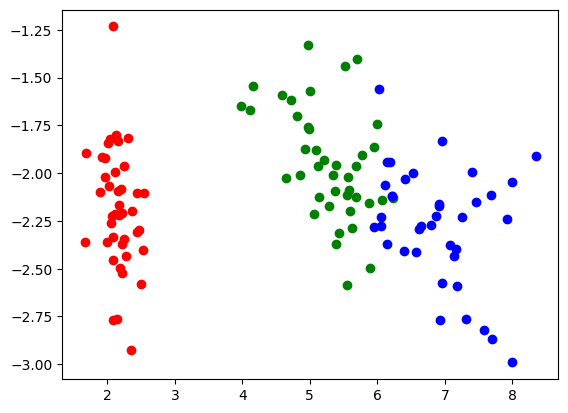

Original Data Size: (120, 4) 
Modified Data Size: (120, 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def transform(self, X, y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        scatter_t = np.cov(X.T) * (height - 1)
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items) - 1)
        
        scatter_b = scatter_t - scatter_w
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)
        pc = X.dot(eig_vectors[:, ::-1][:, :self.n_components])
        print(pc.shape)

        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:, 0], pc[:, 1])
            else:
                colors = ['r', 'g', 'b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y == label)]
                    plt.scatter(class_data[:, 0], class_data[:, 1], c=color)
            plt.show()
        return pc

LDA_obj = LDA(2)
data = load_iris()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

LDA_object = LDA(2)
X_train_modified = LDA_object.transform(X_train, Y_train)

print("Original Data Size:", X_train.shape, "\nModified Data Size:", X_train_modified.shape)
